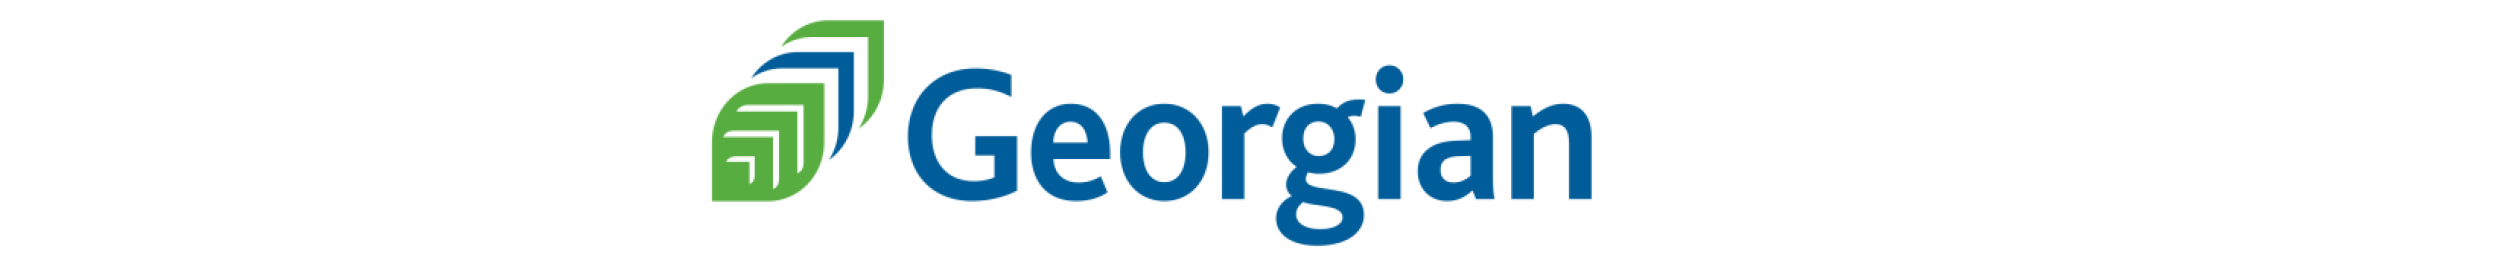
# BDAT 1004 – Data Programming - Problem Set 2

#### Instructor: Professor Ethan Davis
Student Name: Yi-Chen Hsiao

Student Number: 200540377

Section 2

### Question 1

Consider the following Python module:
    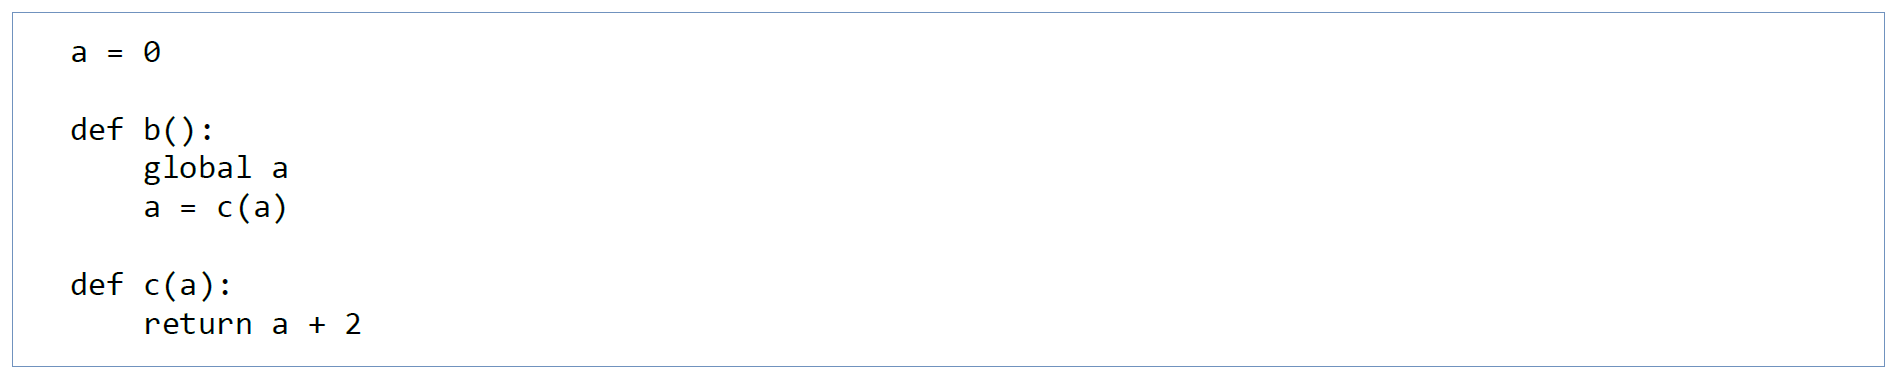
After importing the module into the interpreter, you execute:
    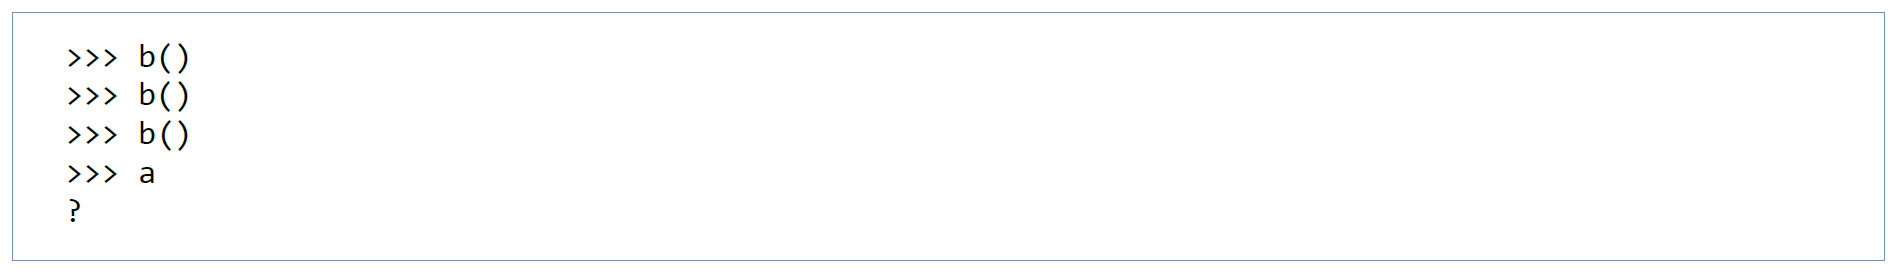
What value is displayed when the last expression (a) is evaluated? 

Explain your answer by indicating what happens in every executed statement.

### Answer 1

The value displayed when the last expression (a) is evaluated is 6. 

In function b(), we use 'global' declaration before vairable 'a', so function b() can change the value of 'a' both inside and outside the function.

Since function b() has been executed three times in this example, function c(a) has been executed three times as well. So the original value of 'a' has been plus 2 for three times. That makes a = 0 + 2 + 2 + 2 = 6.

In [54]:
a = 0

def b():
    global a  #function b() can change the value of a both inside and outside of this function
    a = c(a)  #function c(a) will be executed each time function b() has been executed

def c(a):
    return a + 2  #a will be plus 2 each time function c(a) is executed

In [55]:
b()  #function b() - 1st execution - a = 0 + 2 = 2
b()  #function b() - 2nd execution - a = 2 + 2 = 4
b()  #function b() - 3rd execution - a = 4 + 2 = 6 
a

6

### Question 2

Function fileLength(), given to you, takes the name of a file as input and returns the length of the file:
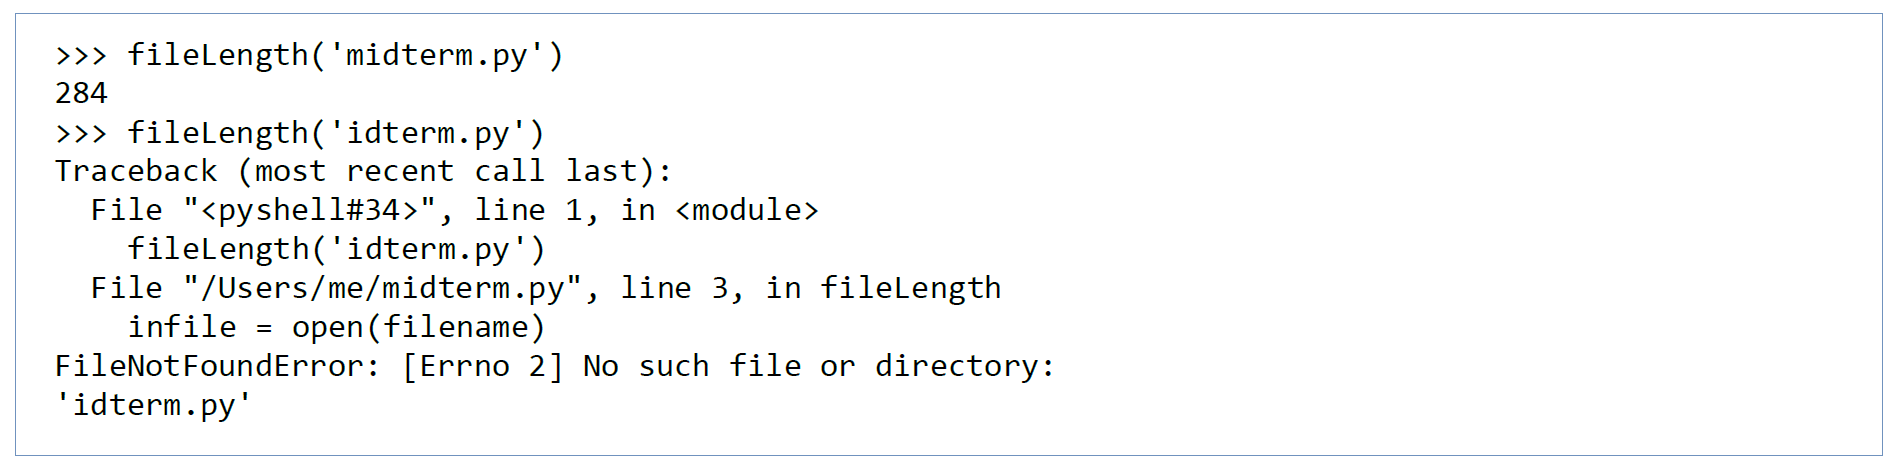
As shown above, if the file cannot be found by the interpreter or if it cannot be read as a text file, an exception will be raised. Modify function fileLength() so that a friendly message is printed instead:
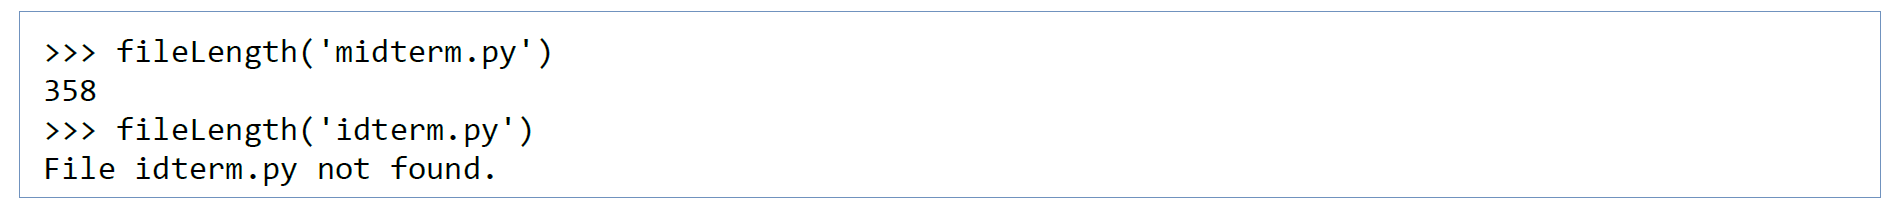

### Answer 2

In [51]:
def file_length(file_name):
    #Use try/except statement to handle exceptions
    try:
        file = open(file_name)
        contents = file.read()
        file.close()
        print(len(contents))
    except:
        print('File {} not found.'.format(file_name))

In [52]:
file_length('hello.txt')

86


In [53]:
file_length('ello.txt')

File ello.txt not found.


### Question 3

Write a class named Marsupial that can be used as shown below:
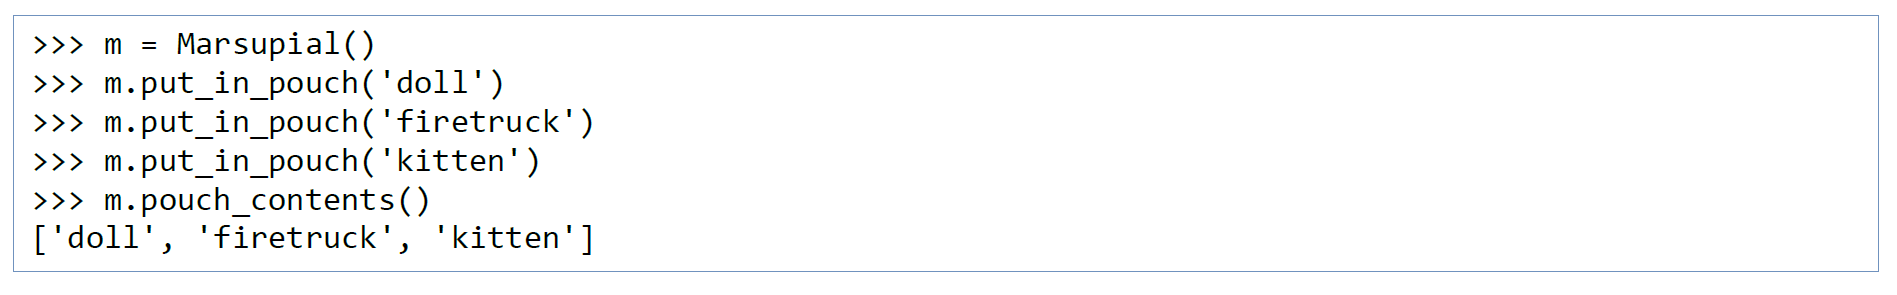
Now write a class named Kangaroo as a subclass of Marsupial that inherits all the attributes of Marsupial and also:

    a. extends the Marsupial __init__ constructor to take, as input, the coordinates x and y of the Kangaroo object,
    b. supports method jump that takes number values dx and dy as input and moves the kangaroo by dx units along the x-axis and by dy units along the y-axis, an
    c. overloads the __str__ operator so it behaves as shown below.
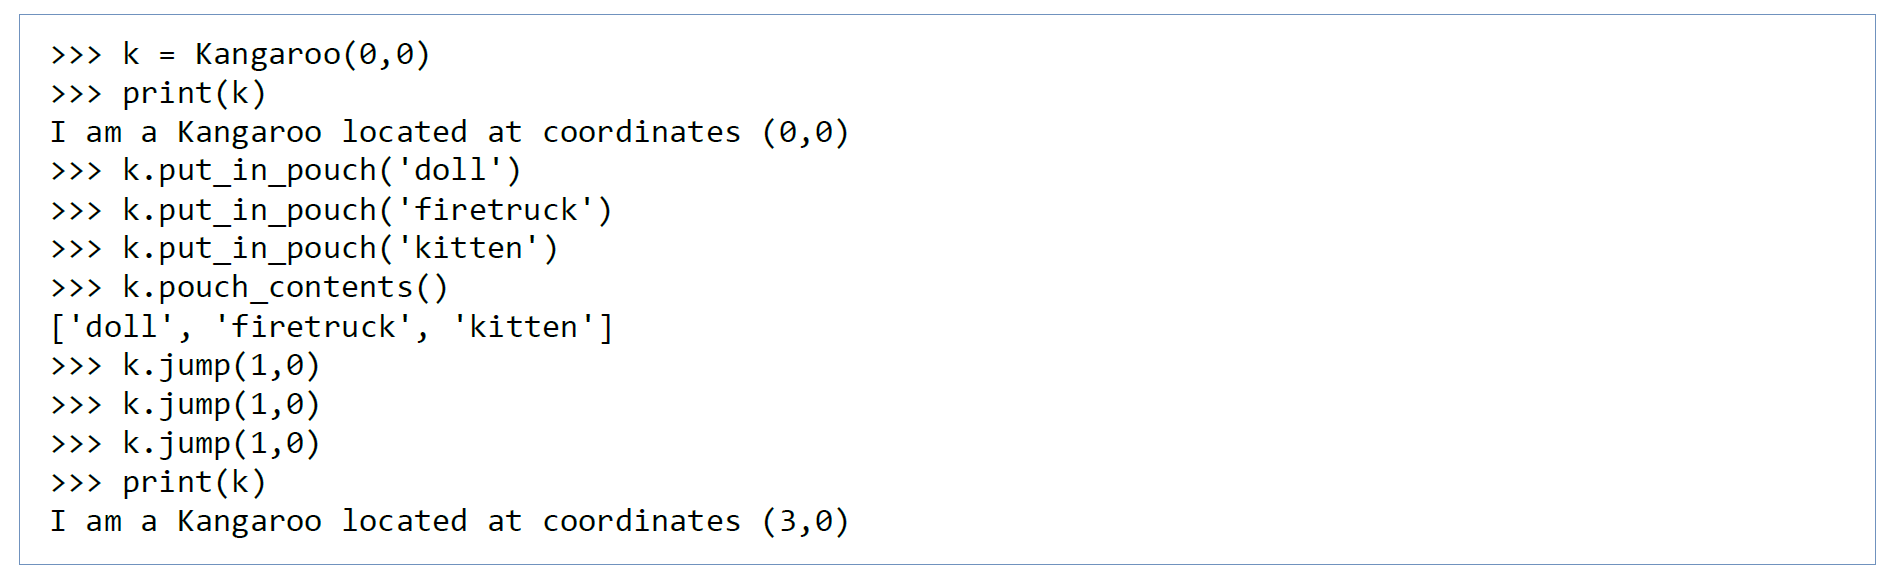

### Answer 3-1. Create the Marsupial() class

In [41]:
class Marsupial():
    def __init__(self):
        'instantiates an empty list'
        self.q = []

    def put_in_pouch(self, item):
        return self.q.append(item)
    
    def pouch_contents(self):
        print(self.q)

In [42]:
m = Marsupial()
m.put_in_pouch('doll')
m.put_in_pouch('firetruck')
m.put_in_pouch('kitten')
m.pouch_contents()

['doll', 'firetruck', 'kitten']


### Answer 3-2. Create the Kangaroo() subclass

In [47]:
class Kangaroo(Marsupial):
    def __init__(self, xcoord, ycoord):
        self.q = []
        self.x = xcoord
        self.y = ycoord
    
    def getxy(self):
        return (self.x,self.y)
    
    def jump(self, dx, dy):
        self.x += dx
        self.y += dy        

In [48]:
k = Kangaroo(0,0)  #Create an object 'k' which is located at (0,0)
print("I am a Kangaroo located at coordinates {}".format(k.getxy()))

I am a Kangaroo located at coordinates (0, 0)


In [49]:
k.put_in_pouch('doll')
k.put_in_pouch('firetruck')
k.put_in_pouch('kitten')
k.pouch_contents()

['doll', 'firetruck', 'kitten']


In [50]:
k.jump(1,0)
k.jump(1,0)
k.jump(1,0)
print("I am a Kangaroo located at coordinates {}".format(k.getxy()))

I am a Kangaroo located at coordinates (3, 0)


### Question 4

Write function collatz() that takes a positive integer x as input and prints the Collatz sequence starting at x. A Collatz sequence is obtained by repeatedly applying this rule to the previous number x in the sequence:
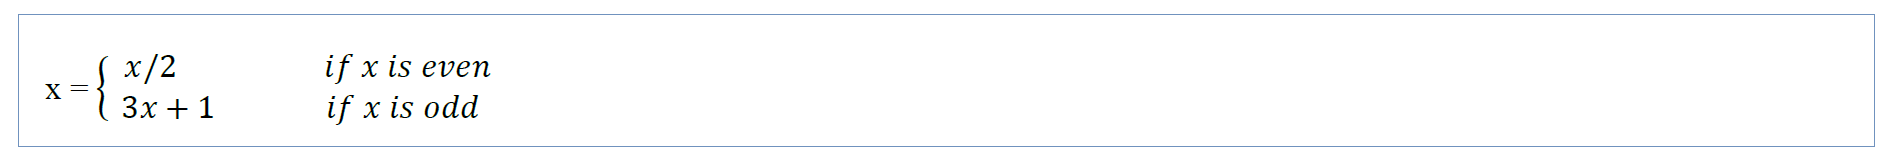
Your function should stop when the sequence gets to number 1. Your implementation must be recursive, without any loops.
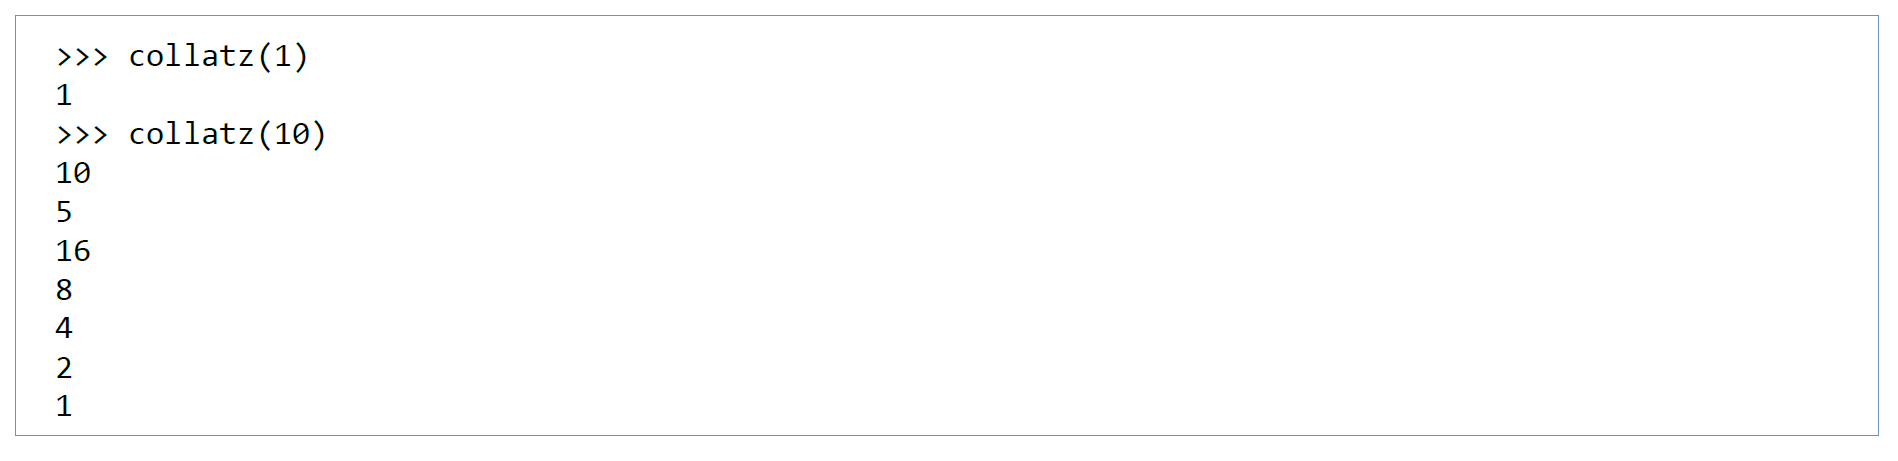

### Answer 4

In [38]:
def collatz(x):
    if x <= 1:
        print(x)
        
    elif x%2 == 0:
        print(x)
        collatz(int(x/2))
        
    else:
        print(x)
        collatz(3*x+1)

In [39]:
collatz(1)

1


In [40]:
collatz(10)

10
5
16
8
4
2
1


### Question 5

Write a recursive method binary() that takes a non-negative integer n and prints the binary representation of integer n.
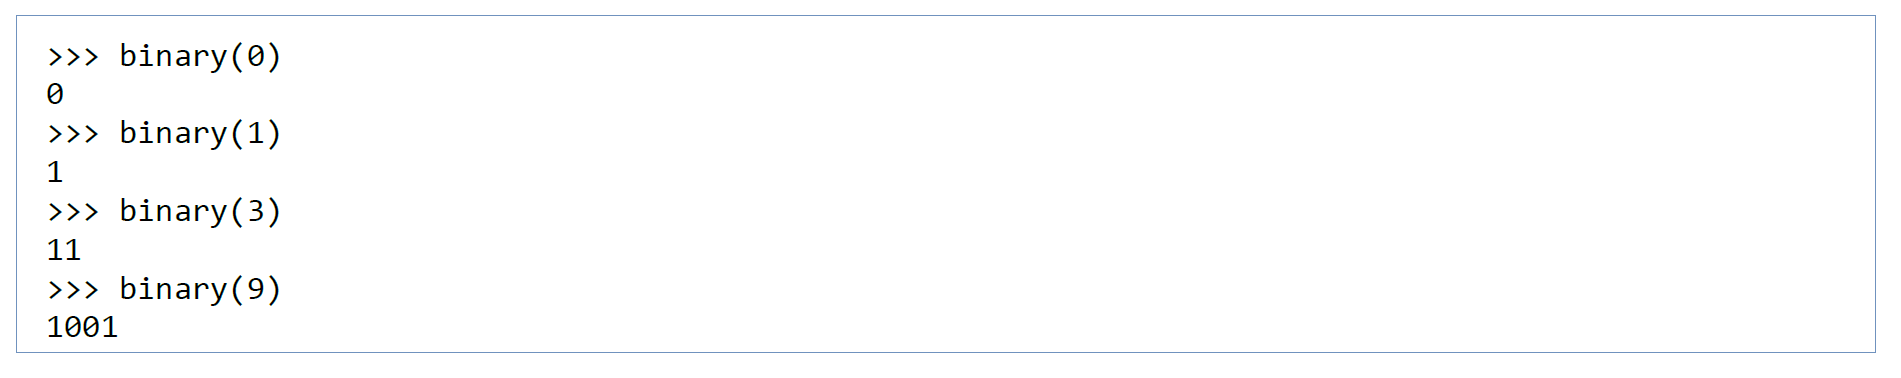

### Answer 5

In [32]:
def binary(x):
    if x <=1:
        print(x, end='')
    else:
        binary(x//2)
        print(x%2, end='')

In [33]:
binary(0)

0

In [34]:
binary(1)

1

In [35]:
binary(3)

11

In [36]:
binary(9)

1001

### Question 6

Implement a class named HeadingParser that can be used to parse an HTML document, and retrieve and print all the headings in the document. You should implement your class as a subclass of HTMLParser, defined in Standard Library module html.parser. When fed a string containing HTML code, your class should print the headings, one per line and in the order in which they appear in the document. Each heading should be indented as follows: an h1 heading should have indentation 0, and h2 heading should have indentation 1, etc. Test your implementation using w3c.html.
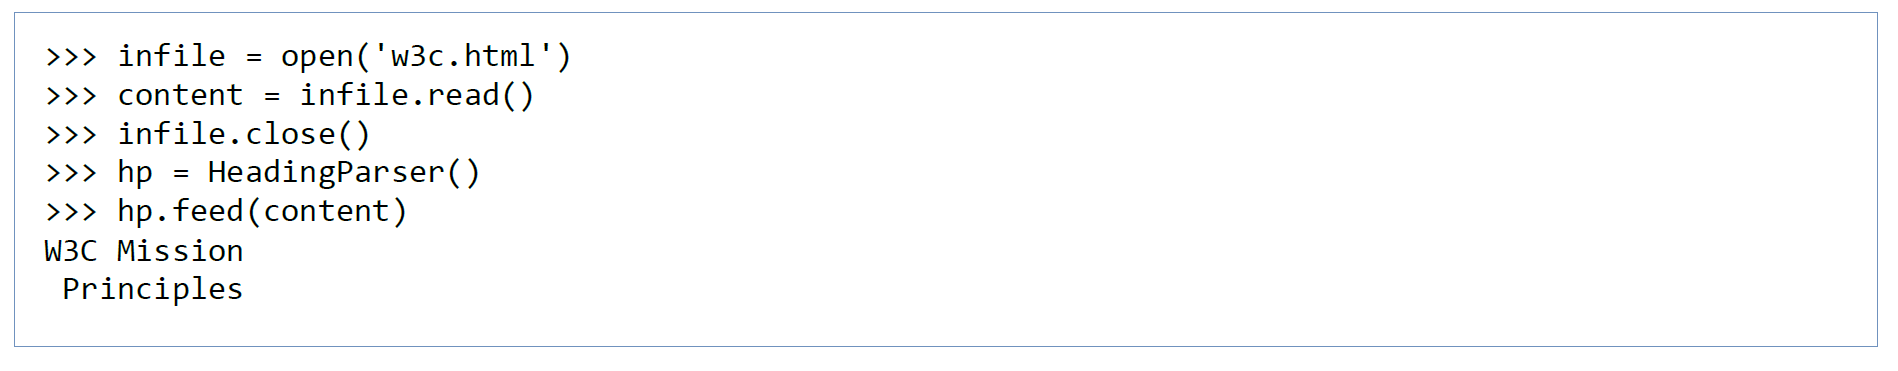

### Answer 6

In [89]:
from html.parser import HTMLParser

class HeadingParser(HTMLParser):
    found_h1 = False
    found_h2 = False
    def __init__(self):
        super().__init__()
        self.reset()
    
    def handle_starttag(self, tag, attrs):
        if tag == 'h1':
            self.found_h1 = True
        if tag == 'h2':
            self.found_h2 = True

    def handle_data(self, data):
        if self.found_h1:
            print(data)
        if self.found_h2:
            print(' ' + data)

    def handle_endtag(self, tag):
        if tag =='h1':
            self.found_h1 = False
        if tag =='h2':
            self.found_h2 = False

infile = open('w3c.html')
content = infile.read()
infile.close()
hp = HeadingParser()
hp.feed(content)


W3C Mission
 Principles


### Question 7

Implement recursive function webdir() that takes as input: a URL (as a string) and non-negative integers depth and indent. Your function should visit every web page reachable from the starting URL web page in depth clicks or less, and print each web page's URL. As shown below, indentation, specified by indent, should be used to indicate the depth of a URL.
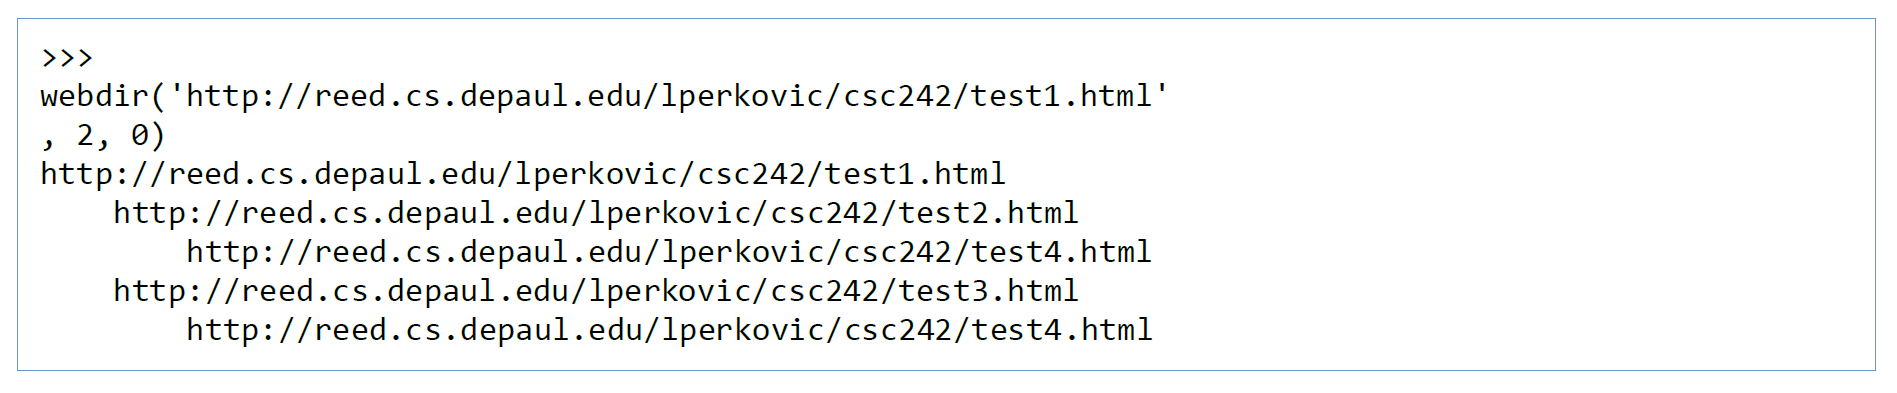

### Answer 7

In [4]:
from urllib.parse import urljoin
from html.parser import HTMLParser
class Collector(HTMLParser):
    'collects hyperlink URLs into a list'

    def __init__(self, url):
        'initializes parser, the url, and a list'
        HTMLParser.__init__(self)
        self.url = url
        self.links = []

    
    def handle_starttag(self, tag, attrs):
        'collects hyperlink URLs in their absolute format'
        if tag == 'a':
            for attr in attrs:
                if attr[0] == 'href':
                    # construct absolute URL
                    absolute = urljoin(self.url, attr[1])
                    if absolute[:4] == 'http': # collect HTTP URLs
                        self.links.append(absolute)
                        
    def getLinks(self):
        'returns hyperlinks URLs in their absolute format'
        return self.links

In [21]:
from urllib.request import urlopen
from urllib.parse import urljoin

from html.parser import HTMLParser

def webdir(url):

    # obtain links in the web page
    content = urlopen(url).read().decode()
    collector = Collector(url)
    collector.feed(content)
    urls = collector.getLinks()          # get list of links

    return urls

webdir('http://reed.cs.depaul.edu/lperkovic/one.html')

['http://reed.cs.depaul.edu/lperkovic/two.html',
 'http://reed.cs.depaul.edu/lperkovic/three.html']

In [23]:
'try recursive'

from urllib.request import urlopen
from urllib.parse import urljoin

from html.parser import HTMLParser

def webdir(url):

    # obtain links in the web page
    content = urlopen(url).read().decode()
    collector = Collector(url)
    collector.feed(content)
    global urls
    urls = collector.getLinks()          # get list of links

    return urls

webdir('http://reed.cs.depaul.edu/lperkovic/one.html')

['http://reed.cs.depaul.edu/lperkovic/two.html',
 'http://reed.cs.depaul.edu/lperkovic/three.html']

In [18]:
urls[1]

'http://reed.cs.depaul.edu/lperkovic/three.html'

In [19]:
webdir(urls[1])

['http://reed.cs.depaul.edu/lperkovic/four.html']

### Question 8

Write SQL queries on the below database table that return:

    a) All the temperature data.
    b) All the cities, but without repetition.
    c) All the records for India.
    d) All the Fall records.
    e) The city, country, and season for which the average rainfall is between 200 and 400 millimeters.
    f) The city and country for which the average Fall temperature is above 20 degrees, in increasing temperature order.
    g) The total annual rainfall for Cairo.
    h) The total rainfall for each season.
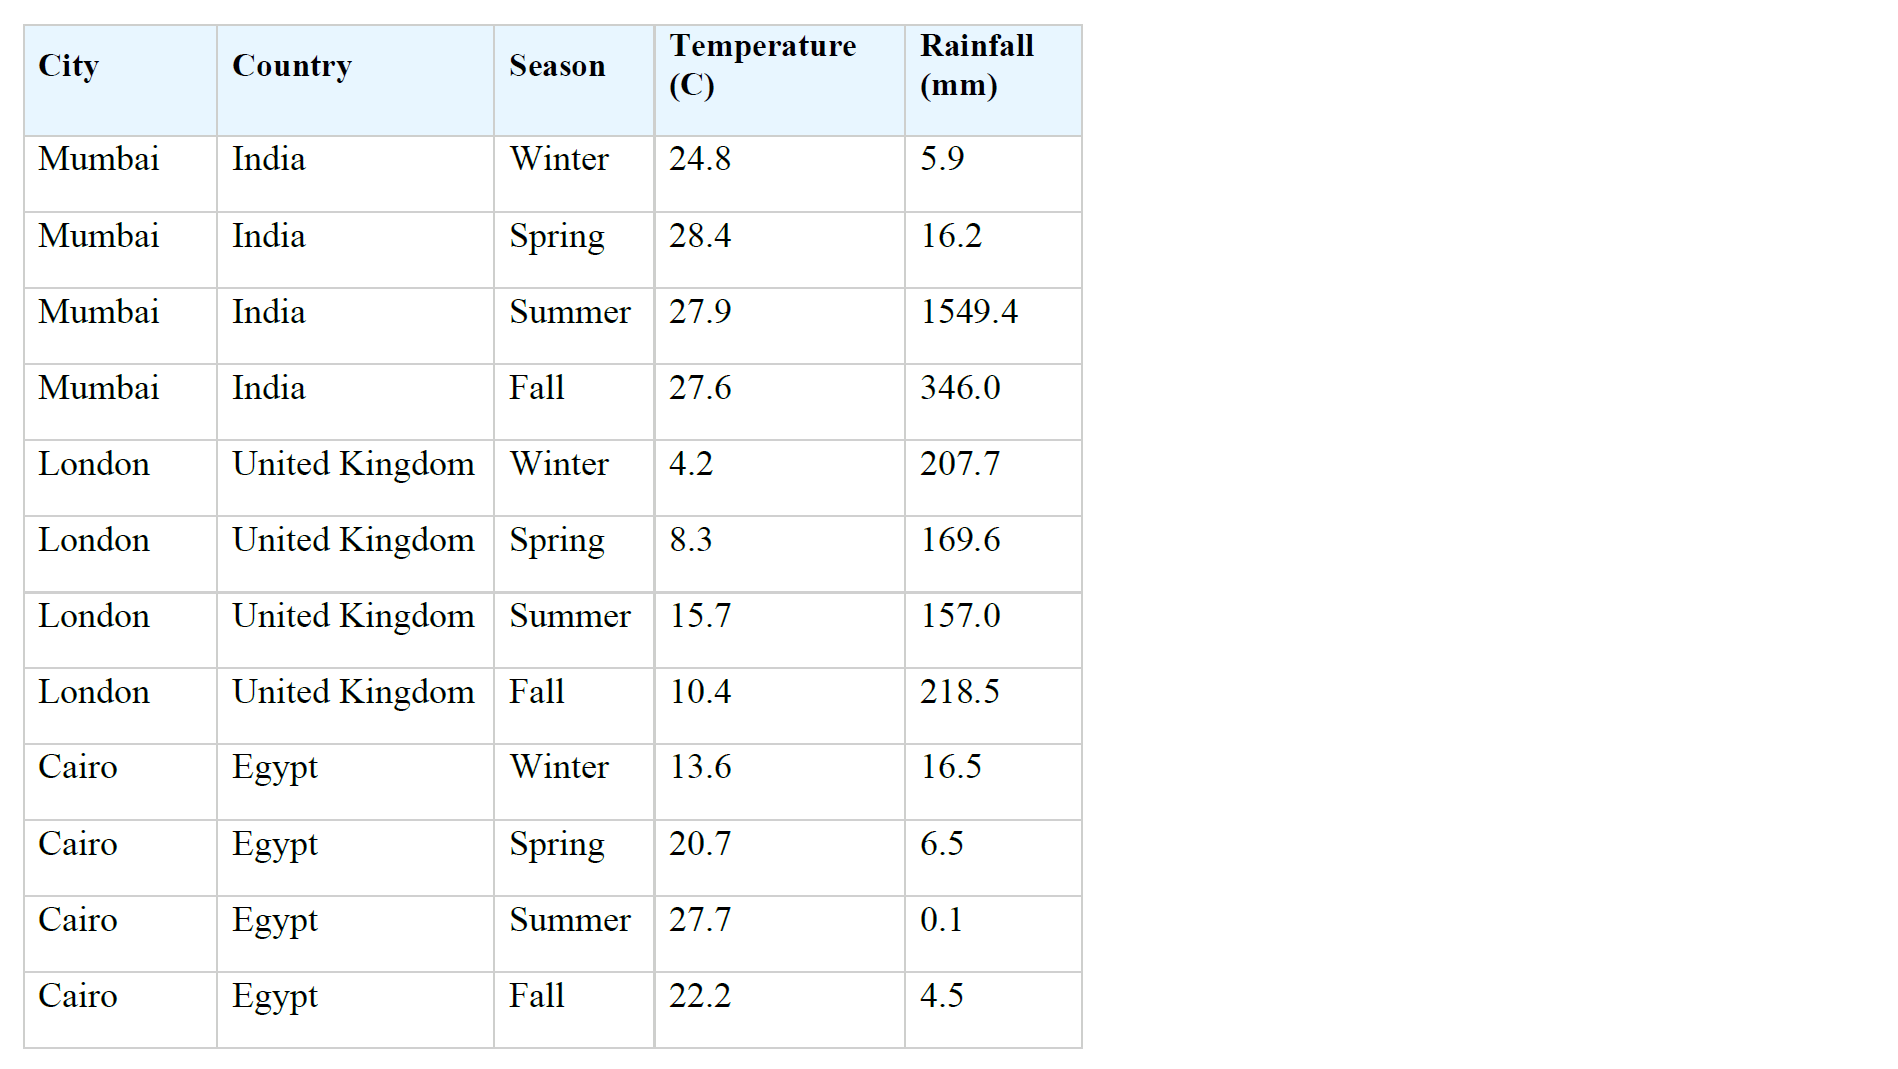

### Answer 8

Assume the table name = 'CityDetail'

a) All the temperature data.

--> SELECT Temperature FORM CityDetail

b) All the cities, but without repetition.

--> SELECT DISTINCT City FROM CityDetails;

c) All the records for India.

--> SELECT * FROM dbo.CityDetails
    WHERE Country = 'India';

d) All the Fall records.

--> SELECT * FROM dbo.CityDetails
    WHERE Season = 'Fall';
    
e) The city, country, and season for which the average rainfall is between 200 and 400 millimeters.

--> SELECT City, Country, Season FROM dbo.CityDetails
    WHERE Rainfall BETWEEN 200 and 400;

f) The city and country for which the average Fall temperature is above 20 degrees, in increasing temperature order.

--> SELECT City, Country FROM dbo.CityDetails
    WHERE Season = 'Fall' AND Temperature > 20
    ORDER BY Temperature;

g) The total annual rainfall for Cairo.

--> SELECT SUM(Rainfall) FROM dbo.CityDetails 
    WHERE City = 'Cairo';

h) The total rainfall for each season.

--> SELECT Season, SUM(Rainfall) FROM dbo.CityDetails
    GROUP BY Season;

In [24]:
 !pip install ipython-sql

  Created wheel for prettytable: filename=prettytable-0.7.2-py3-none-any.whl size=13714 sha256=08d6b64f08345968309dcd96a1a47a5e043d89f90e1e63b2bade87628e06b779
  Stored in directory: c:\users\yi chen\appdata\local\pip\cache\wheels\75\f7\28\77a076f1fa8cbeda61aca712815d04d7a32435f04a26a2dd7b
Successfully built prettytable


### Question 9

Suppose list words is defined as follows:
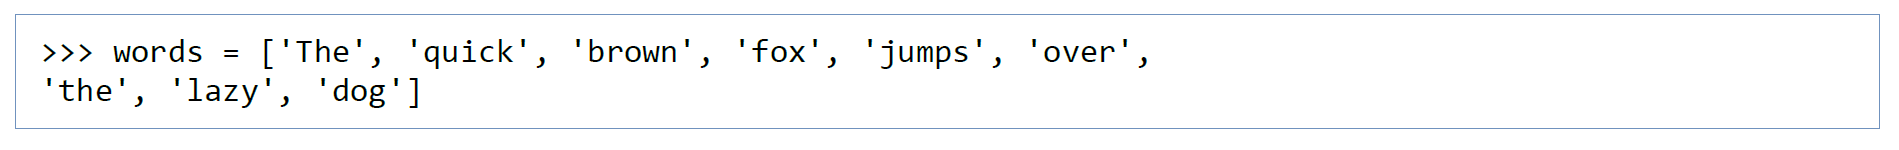
Write list comprehension expressions that use list words and generate the following lists:
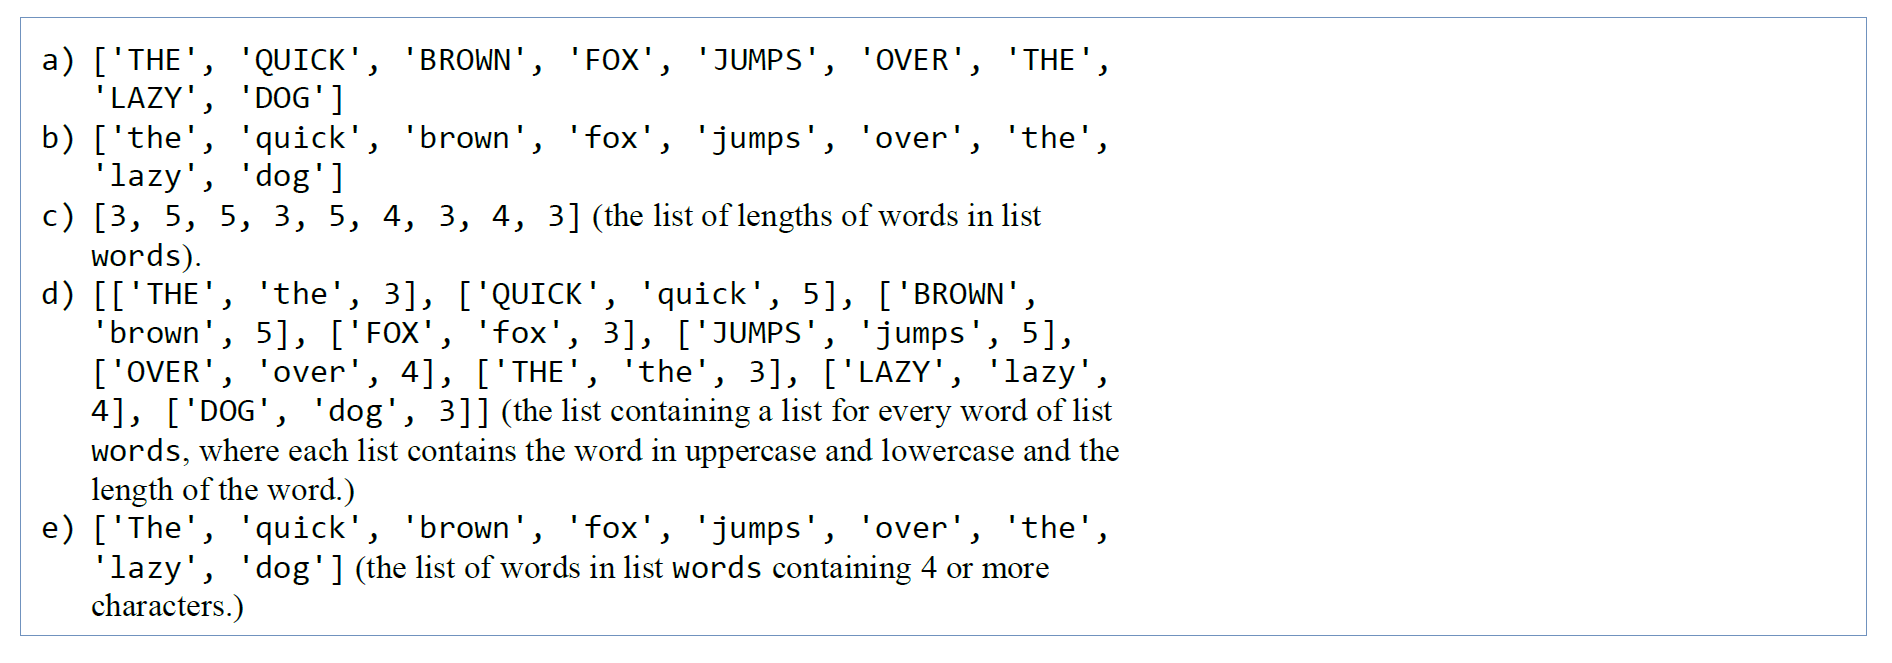

### Answer 9

In [109]:
words = ['The', 'quick', 'brown', 'fox', 'jumps', 'over', 'the', 'lazy', 'dog']

print(words)

#List a - list comprehension expressions
newwords_a = [i.upper() for i in words]
print(newwords_a)

#List b - list comprehension expressions
newwords_b = [i.lower() for i in words]
print(newwords_b)

#List c - list comprehension expressions
newwords_c = [len(i) for i in words]
print(newwords_c)

#List d - list comprehension expressions
newwords_d = [[i.upper(),i.lower(),len(i)] for i in words]
print(newwords_d)

#List e - list comprehension expressions
newwords_e = [i for i in words if len(i) >= 4]
print(newwords_e)


['The', 'quick', 'brown', 'fox', 'jumps', 'over', 'the', 'lazy', 'dog']
['THE', 'QUICK', 'BROWN', 'FOX', 'JUMPS', 'OVER', 'THE', 'LAZY', 'DOG']
['the', 'quick', 'brown', 'fox', 'jumps', 'over', 'the', 'lazy', 'dog']
[3, 5, 5, 3, 5, 4, 3, 4, 3]
[['THE', 'the', 3], ['QUICK', 'quick', 5], ['BROWN', 'brown', 5], ['FOX', 'fox', 3], ['JUMPS', 'jumps', 5], ['OVER', 'over', 4], ['THE', 'the', 3], ['LAZY', 'lazy', 4], ['DOG', 'dog', 3]]
['quick', 'brown', 'jumps', 'over', 'lazy']
